In [1]:
#########################################################################
#
# This is my notebook on finding out all the properties of the cosmic web 
#
# Based on Peter Behroozi's Catalogue, we are in z + 1 = 1.00231 ~0
#
########################################################################

import numpy as np
import scipy
from scipy import io
import random
from scipy.stats import itemfreq
import matplotlib.pyplot as plt
import math
from __future__ import division

plt.rcParams['figure.figsize']=(18,18)
%matplotlib inline

In [2]:
# Now we are obtaining Miguel's WALL Catalogue
miguel = scipy.io.readsav("Particles.0273.wall_catalog_and_properties.IDL",idict=None,
                     python_dict=True, uncompressed_file_name=None,
                     verbose=False)
# Let's call Miguel's WALL catalague a simple name - it's a dictionary
m_wall = miguel

In [3]:
# Now we are obtaining Peter Behroozi's Catalogue at z =0
behroozi = np.load('hlist_1.00231.npy')

#  Let's call Behroozi's catalogue a simply name -- it's an array
b = behroozi

In [4]:
# These are indexed such that i = [Catalogue No.]
print ('Halo Catalogue Numbers:',len(b))
# Each array has 93 items
print ('Number of items in each Catalogue:',len(b[0]))
# A sample of one Catalogue


('Halo Catalogue Numbers:', 12085858)
('Number of items in each Catalogue:', 93)


In [5]:
# Let's look at Miguel's other catalogues : WALL

print(len(m_wall))

# Each item in here is a Wall Number with i = Catalogue No.
print('wall_id0:',m_wall['wall_id0'])
print('wall_id1:',m_wall['wall_id1'])
print('wall_id2:',m_wall['wall_id2'])

# Each item here is the distance to the nearest halo with i = Wall No.
print('wall0_radius:',m_wall['wall0_radius'])
print('wall1_radius"',m_wall['wall1_radius'])
print('wall2_radius',m_wall['wall2_radius'])

# Each item in here is a Wall Number with i = Catalogue No.
print('wall_id0 length:',len(m_wall['wall_id0']))
print('wall_id1 length:',len(m_wall['wall_id1']))
print('wall_id2 length:',len(m_wall['wall_id2']))

# The max value of the wall_iDs should be one less than the length of the wall radius.
print('wall_id0 max:',max(m_wall['wall_id0']))
print('wall_id1 max:',max(m_wall['wall_id1']))
print('wall_id2 max:',max(m_wall['wall_id2']))

# Each item here is the distance to the nearest halo with i = Wall No.
print('wall0_radius length:',len(m_wall['wall0_radius']))
print('wall1_radius length:',len(m_wall['wall1_radius']))
print('wall2_radius length:',len(m_wall['wall2_radius']))

6
('wall_id0:', array([5814,   -1, 3013, ...,   -1,   -1,   -1], dtype=int32))
('wall_id1:', array([  -1,   -1, 1037, ...,   -1,   -1,   -1], dtype=int32))
('wall_id2:', array([ -1,  -1, 541, ...,  -1,  -1,  -1], dtype=int32))
('wall0_radius:', array([  8.33877182,   1.69819248,  11.23417664, ...,   5.70090437,
         4.86795235,   4.81701899], dtype=float32))
('wall1_radius"', array([  4.77349663,   7.10805368,   8.62508774, ...,  11.19017982,
         8.11156464,   7.49774981], dtype=float32))
('wall2_radius', array([ 18.80059242,  14.49693489,  14.33373165, ...,  16.68550491,
        14.39515018,   8.89900208], dtype=float32))
('wall_id0 length:', 12085858)
('wall_id1 length:', 12085858)
('wall_id2 length:', 12085858)
('wall_id0 max:', 59010)
('wall_id1 max:', 19289)
('wall_id2 max:', 6308)
('wall0_radius length:', 59011)
('wall1_radius length:', 19290)
('wall2_radius length:', 6309)


In [6]:
# P E T E R   B E H R O O Z I
# For Peter's Catalogue, I introduce this new index j. This is just the index for 1 of the 93th info about each catalogue
j=0
# So, let's take a look at our Halo Catalogues by Peter Behroozi
# These are indexed such that i = [Catalogue No.]

# Let's translate Peter's Catalogue:
b_tran ={0:'scale',1:'id',2:'desc_scale', 3:'desc_id',4:'num_prog',5:'pid', 6:'upid',
         7:'desc_pid',8:'phantom',9:'sam_mvir', 10:'mvir',11:'rvir',12:'rs', 13:'vrms',
         14:'mmp?',15:'scale_of_last_MM',16:'vmax', 17:'x',18:'y',19:'z', 20:'vx',21:'vy',
         22:'vz',23:'Jx',24:'Jy', 25:'Jz',26:'Spin',27:'Breadth_first_ID', 28:'Depth_first_ID',
         29:'Tree_root_ID', 30:'Orig_halo_ID',31:'Snap_num',32:'Next_coprogenitor_depthfirst_ID',
         33:'Last_progenitor_depthfirst_ID',34:'Rs_Klypin',35:'Mvir_all',36:'M200b',37:'M200c',
         38:'M500c',39:'M2500c',40:'Xoff',41:'Voff',42:'Spin_Bullock',43:'b_to_a',44:'c_to_a',
         45:'A[x]',46:'A[y]',47:'A[z]',48:'b_to_a(500c)',49:'c_to_a(500c)',50:'A[x](500c)',
         51:'A[y](500c)',52:'A[z](500c)',53:'T/|U|',54:'M_pe_Behroozi',55:'M_pe_Diemer',
         56:'Macc',57:'Mpeak',58:'Vacc',59:'Vpeak',60:'Halfmass_Scale',61:'Acc_Rate_Inst',
         62:'Acc_Rate_100Myr',63:'Acc_Rate_1*Tdyn',64:'Acc_Rate_2*Tdyn',65:'Acc_Rate_Mpeak',
         66:'Mpeak_Scale',67:'Acc_Scale', 68:'First_Acc_Scale',69:'First_Acc_Mvir',
         70:'First_Acc_Vmax',71:'Vmax@Mpeak',72:'density_CIC',73:'density_1/2',74:'density_1',
         75:'density_2',76:'density_4',77:'density_8',78:'density_16',79:'C_NFW', 80:'bs_ratio',
         81:'cost',82:'P_rvir',83:'P_r500',84:'Mdot/M_inst', 85:'Mdot/M_tdyn',86:'Mdot/M_t2dyn',
         87:'logM/logM*',88:'C_Klypin',89:'Last_mainleaf_depthfirst_ID',90:'Tidal_Force', 
         91:'Tidal_ID',92:'Tidal_Force_Tdyn'
                 }

In [7]:
# E X E R C I S E  4 

# Let's find out how many halo there are in each Wall.

WALL2 = []
for k in range(12085858):
    # Let's pick a void smooth on 4mpc - ie it will have less voids, and is simply to compute for now.
    WALL2.append(m_wall['wall_id2'][k])



In [8]:
# E X E R C I S E  4 
# P A T C H  U P  M I G U E L ' S  L I S T
# Wall Number , Frequency that Wall Number occurs in the whole B catalogue
wall_freq2 = itemfreq(WALL2)
temp = np.array(wall_freq2,dtype=float)
wall_freq2 = temp

# Argh, we have to patch it up because the array has holes in it
fix2=[]
for g in range(len(wall_freq2)):
    if wall_freq2[g][0]-wall_freq2[g-1][0]<=len(wall_freq2) :
        middle = (range(int(wall_freq2[g-1][0]+1),int(wall_freq2[g][0])))
        fix2=np.append(fix2,middle)
for h in range(len(fix2)):
    wall_freq2=np.insert(wall_freq2, fix2[h]+1, [fix2[h],0], axis=0)

# Because we are now appending -1 to the wall catalogue, we have to make sure that 
# this value position corresponds to exactly 0 effective radius ( by definition)
m_wall_zero = np.insert(m_wall['wall2_radius'],0,0,axis=0)

# These two numbers M U S T match before you can add the arrays
print(len(wall_freq2))        
print(len(m_wall_zero))

# [Wall Number, Frequency it occurs in the whole B catalogue, effective radius]--smooth2
wall_freq_rad2= np.insert(wall_freq2,2,m_wall_zero,axis=1)
mig_cat2 = wall_freq_rad2
# M I G U E L 

6310
6310


In [9]:
# E X E R C I S E  4 
# B E H R O O Z I
# Let's call in the viral radius from Behroozi's catalogue
# Let's define these 3 keys that I would be using: 
scale=0
iD =1
mvir = 10

# Getting key quantities from Behroozi and Miguel catalogue
iD_cat =[]
mvir_cat=[]
rad_eff =[]
for k in range(len(WALL2)):
    iD_cat.append(b[k][iD])                 # Behroozi's
    mvir_cat.append(b[k][mvir])             # Behroozi's 
    rad_eff.append(mig_cat2[WALL2[k]+1][2]) #Miguel's  : start the index at -1
    
# Let's get the array for Wall, iD and mvir and effective radius!
iD_array = np.asarray(iD_cat)
wall2_array = np.asarray(WALL2)
mvir_array = np.asarray(mvir_cat)
rad_eff_array = np.asarray(rad_eff)
# Let's create Behroozi's array!

beh_cat2 = np.zeros((12085858, 4))
beh_cat2[:,0] = wall2_array
beh_cat2[:,1] = iD_array
beh_cat2[:,2] = mvir_array
beh_cat2[:,3] = rad_eff_array



In [10]:
# E X E R C I S E  5 

# Let's find out how many halo there are in each Wall.
WALL1 = []
for k in range(12085858):
    # Let's pick a void smooth on 4mpc - ie it will have less voids, and is simply to compute for now.
    WALL1.append((m_wall['wall_id1'][k]))

In [11]:
# E X E R C I S E  5
# M I G U E L 
# Wall Number , Frequency that Wall Number occurs in the whole B catalogue
wall_freq1 = itemfreq(WALL1)
temp = np.array(wall_freq1,dtype=float)
wall_freq1 = temp

# Argh, we have to patch it up because the array has holes in it
fix1=[]
for g in range(len(wall_freq1)):
    if wall_freq1[g][0]-wall_freq1[g-1][0]<=len(wall_freq1) :
        middle = (range(int(wall_freq1[g-1][0]+1),int(wall_freq1[g][0])))
        fix1=np.append(fix1,middle)   
for h in range(len(fix1)):
    wall_freq1=np.insert(wall_freq1, fix1[h]+1, [fix1[h],0], axis=0)
    
# Because we are now appending -1 to the wall catalogue, we have to make sure that 
# this value position corresponds to exactly 0 effective radius ( by definition)
m_wall_zero = np.insert(m_wall['wall1_radius'],0,0,axis=0)

# These two numbers M U S T match before you can add the arrays
print(len(wall_freq1))        
print(len(m_wall_zero))

# Let's append the radius array to our void_freq array
# [Wall Number, Frequency it occurs in the whole B catalogue, it's effective radius]--smooth2
wall_freq_rad1= np.insert(wall_freq1,2,m_wall_zero,axis=1)
mig_cat1 = wall_freq_rad1

19291
19291


In [12]:
# E X E R C I S E  5 
# B E H R O O Z I
# Let's call in the viral radius from Behroozi's catalogue
# Let's define these 3 keys that I would be using: 
scale=0
iD =1
mvir = 10

# Getting key quantities from Behroozi and Miguel catalogue
iD_cat =[]
mvir_cat=[]
rad_eff = []
for k in range(len(WALL1)):
    iD_cat.append(b[k][iD])     # Behroozi's
    mvir_cat.append(b[k][mvir]) # Behroozi's 
    rad_eff.append(mig_cat1[WALL1[k]+1][2]) #Miguel's  : WALL[k] start the index at -1
    
# Let's get the array for Wall, iD and mvir and effective radius!
iD_array = np.asarray(iD_cat)
wall1_array = np.asarray(WALL1)
mvir_array = np.asarray(mvir_cat)
rad_eff_array = np.asarray(rad_eff)
# Let's create Behroozi's array!

beh_cat1 = np.zeros((12085858, 4))
beh_cat1[:,0] = wall1_array
beh_cat1[:,1] = iD_array
beh_cat1[:,2] = mvir_array
beh_cat1[:,3] = rad_eff_array

In [13]:
# If you should ever need to recover the previous plots that have a gradient, 
#here is the code i used for  Miguel's plot the first time roung
#for i in range(len(WALL1)):
#    rad_eff.append((m_wall['wall1_radius'][m_wall['wall_id1'][i]])) #Miguel's
    

In [14]:
# E X E R C I S E  6 

# Let's have a simple exercise. Let's find out how many halo there 
# are in each Wall.

WALL0 = []
for k in range(12085858):
    # Let's pick a void smooth on 4mpc - ie it will have less voids, and is simply to compute for now.
    WALL0.append((m_wall['wall_id0'][k]))

In [15]:
# E X E R C I S E  6
# M I G U E L 

# Wall Number , Frequency that Wall Number occurs in the whole B catalogue
wall_freq0 = itemfreq(WALL0)
temp = np.array(wall_freq0,dtype=float)
wall_freq0 = temp

# Argh, we have to patch it up because the array has holes in it
fix0=[]
for g in range(len(wall_freq0)):
    if wall_freq0[g][0]-wall_freq0[g-1][0]<=len(wall_freq0) :
        middle = (range(int(wall_freq0[g-1][0]+1),int(wall_freq0[g][0])))
        fix0=np.append(fix0,middle)
for h in range(len(fix0)):
    wall_freq0=np.insert(wall_freq0, fix0[h]+1, [fix0[h],0], axis=0)

# Because we are now appending -1 to the wall catalogue, we have to make sure that 
# this value position corresponds to exactly 0 effective radius ( by definition)
m_wall_zero = np.insert(m_wall['wall0_radius'],0,0,axis=0)

# These two numbers M U S T match before you can add the arrays
print(len(wall_freq0))        
print(len(m_wall_zero))

# Let's append the radius array to our void_freq array
# [Wall Number, Frequency it occurs in the whole B catalogue, it's effective radius]--smooth2
wall_freq_rad0= np.insert(wall_freq0,2,m_wall_zero,axis=1)
mig_cat0 = wall_freq_rad0

59012
59012


In [16]:
# E X E R C I S E  6 
# B E H R O O Z I
# Let's call in the viral radius from Behroozi's catalogue
# Let's define these 3 keys that I would be using: 
scale=0
iD =1
mvir = 10

# Getting key quantities from Behroozi and Miguel catalogue
iD_cat =[]
mvir_cat=[]
rad_eff = []
for k in range(len(WALL0)):
    iD_cat.append(b[k][iD])     # Behroozi's
    mvir_cat.append(b[k][mvir]) # Behroozi's 
    rad_eff.append(mig_cat0[WALL0[k]+1][2]) #Miguel's  : WALL[k] start the index at -1
    
    
# Let's get the array for Wall, iD and mvir and effective radius!
iD_array = np.asarray(iD_cat)
wall0_array = np.asarray(WALL0)
mvir_array = np.asarray(mvir_cat)
rad_eff_array = np.asarray(rad_eff)
# Let's create Behroozi's array!

beh_cat0 = np.zeros((12085858, 4))
beh_cat0[:,0] = wall0_array
beh_cat0[:,1] = iD_array
beh_cat0[:,2] = mvir_array
beh_cat0[:,3] = rad_eff_array

In [17]:
# You must remove the -1 from the Wall, which means these halos are not in any Walls

new_beh_cat0 = beh_cat0[beh_cat0[:,0] != -1]
new_beh_cat1 = beh_cat1[beh_cat1[:,0] != -1]
new_beh_cat2 = beh_cat2[beh_cat2[:,0] != -1]


In [18]:
# Let's clear some memory space !
b = 0
m_wall = 0
miguel = 0
behroozi = 0
WALL0 = 0
WALL1 = 0
WALL2 = 0
wall_freq_rad0 = 0
wall_freq_rad1 = 0
wall_freq_rad2 = 0

In [19]:
def give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue):
    '''It will return for you a list of 4 arrays : id, halo, radius and mass'''
    
    h=0.7
    
    # Let me get the numbers from the catalogue that we want
    wall = catalogue[:,0]
    halo = catalogue[:,1]
    mass = catalogue[:,2]
    radi = catalogue[:,3]

    # Let's limit the radius 
    mass_output = mass[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
    radi_output = radi[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]*h 
    wall_output = wall[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]
    halo_output = halo[np.logical_and(radi*h >lo_rad , radi*h< hi_rad)]

    # Let's limit the mass
    mass_output2 = mass_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)] 
    radi_output2 = radi_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    wall_output2 = wall_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    halo_output2 = halo_output[np.logical_and(mass_output >lo_mas , 
                                             mass_output< hi_mas)]
    
    return wall_output2,halo_output2,mass_output2,radi_output2

In [20]:
def gimme_walls_w_just_1_halo(no_of_walls0, plot_output2):
    '''You have to give it the frequency array, as well as the plot list. 
    It will then tell you walls with 1 halo, and walls with more than 1 halo, both arrays'''
    # Let's form a whole new array :
    # Wall iD, Frequency of Wall iD, Mass of Halo , Radius 
    # Each Wall iD happens only once
    
    total = np.zeros((len(no_of_walls0), 4))
    # Just getting an iD for this wall
    total[:,0]=no_of_walls0[:,0]
    total[:,1]=no_of_walls0[:,1]

    # It really is a one to one match and checking. 
    for i in range(len(no_of_walls0)):
        for j in range(len(plot_output2[0])):
            # Literally matching the Wall iD
            if total[i][0] == plot_output2[0][j]:
                total[i][2] = plot_output2[2][j] # Mass
                total[i][3] = plot_output2[3][j] # Radius
     
    # When it is exactly 1 halo
    exactly_one_halo =  total[total[:,1] == 1]               

    # When it is more than 1 halo
    more_than_one_halo =  total[total[:,1] != 1]

    # It returns total number of walls , walls with more than 1 halo, walls with exactly 1 halo
    return total, more_than_one_halo, exactly_one_halo

In [21]:
def gimme_walls_w_just_1_halo_not_unique(no_of_walls0, plot_output2):
    '''You have to give it the frequency array, as well as the plot list. 
    It will then tell you walls with 1 halo, and walls with more than 1 halo, both arrays'''
    # Let's form a whole new array :
    # Wall iD, Frequency of Wall iD, Mass of Halo , Radius , Counter
    # Each Wall iD happens as many times as there are Frequency of Wall iD
    
    total = np.zeros((len(no_of_walls0), 5))
    # Just getting an iD for this wall
    total[:,0]=no_of_walls0[:,0]
    total[:,1]=no_of_walls0[:,1]

    # Let's add a new array for extra Wall iDs
    extra = []
    
    # It really is a one to one match and checking. 
    for i in range(len(no_of_walls0)):
        for j in range(len(plot_output2[0])):
            # Literally matching the Wall iD
            if total[i][0] == plot_output2[0][j]:
                if total[i][4] == 0 :
                    total[i][2] = plot_output2[2][j] # Mass
                    total[i][3] = plot_output2[3][j] # Radius
                    total[i][4] = total[i][4] +1 
                else :
                    extra.append([total[i][0],total[i][1],plot_output2[2][j],plot_output2[3][j],0])
    # Let's add this extra to our array
    extra_array = np.asarray(extra)
    temp = np.vstack((total,extra))
    total = temp
    
    # When it is exactly 1 halo
    exactly_one_halo =  total[total[:,1] == 1]               

    # When it is more than 1 halo
    more_than_one_halo =  total[total[:,1] != 1]

    # It returns total number of walls , walls with more than 1 halo, walls with exactly 1 halo
    return total, more_than_one_halo, exactly_one_halo

4399502
1415
('Max No. of halos in walls:', 4.0)
('Max No. of halos in walls:', 4.0)
4


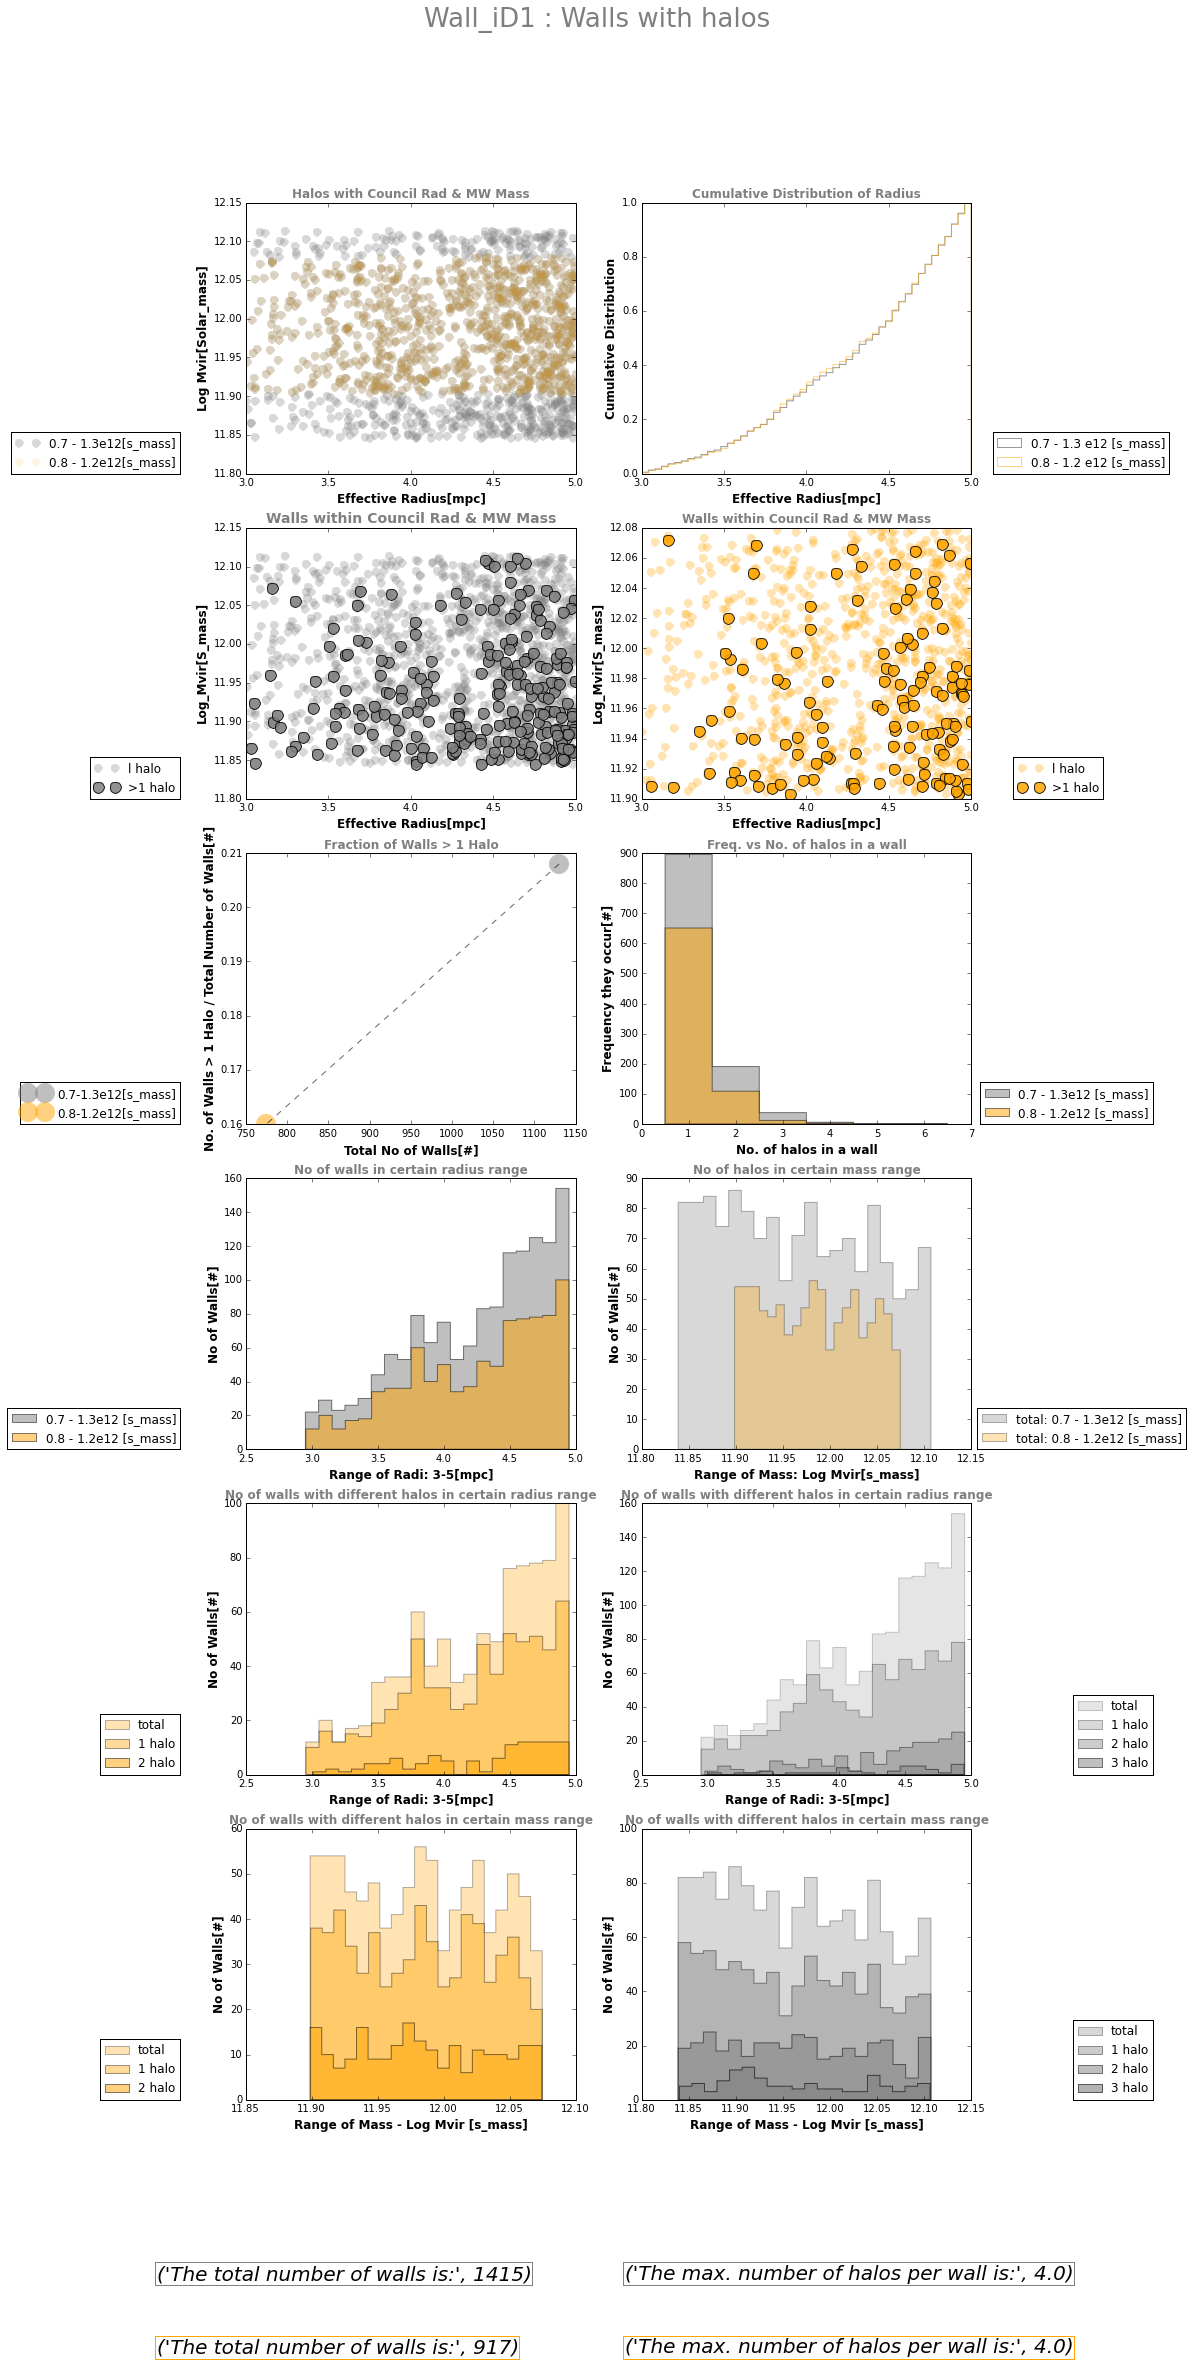

In [24]:
# E X E R C I S E  12 : WALL_iD0
# Let's plot the Council Radius of each halo within Milky Way Mass
# W A L L S  W I T H  H A L O S 

from __future__ import division
#--------------------------------------------------------------------------------

# Let's plot this
fig,ax = plt.subplots(6,2,figsize=(13, 34))
fig.suptitle("Wall_iD1 : Walls with halos", fontsize=26,alpha=0.5)

color1 = "orange"

# You must specify the catalogue you want to look at
catalogue =new_beh_cat1
print(len(catalogue))

# L E T  U S  P L O T  F O R  [ 0  ,  0 ]
# The scatter plot
# G R A Y
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
# Use the Difinition
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
# Let us plot for [0,0]
x = plot_output2[3] # radius
print(len(x))
a = plot_output2[2] # mass
y=[]
for i in range(len(a)):
    y.append(math.log10(a[i]))
# The individual dots
ax[0,0].plot(x,y,marker='o',linestyle='none',color='gray',alpha=0.3,ms=9,
             markeredgewidth=0.0, label = '0.7 - 1.3e12[s_mass] ')

# R E D  
lo_rad =3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3] # radius
a = plot_output2[2] # mass
y=[]
for i in range(len(a)):
    y.append(math.log10(a[i]))
# The individual dots
ax[0,0].plot(x,y,marker='o',linestyle='none',color = color1,alpha=0.1,ms=9,
             markeredgewidth=0.0, label = '0.8 - 1.2e12[s_mass] ')

# The axis
ax[0,0].set_xlabel('Effective Radius[mpc]',fontsize=12,fontweight='bold')
ax[0,0].set_ylabel('Log Mvir[Solar_mass]',fontsize=12,fontweight='bold')
# The Legend
ax[0,0].set_title('Halos with Council Rad & MW Mass ',fontsize=12,fontweight='bold',alpha=0.5)
ax[0,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 0  ,  1]
# The Cumulative radius
# G R A Y
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3] # radius
n_bins = 50
n, bins, patches = ax[0,1].hist(x, n_bins, normed=1, label = '0.7 - 1.3 e12 [s_mass]',
                            histtype='step', cumulative=True,color='gray',alpha = 0.8)
# R E D  
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3] # radius
n_bins = 50

n, bins, patches = ax[0,1].hist(x, n_bins, normed=1, label = '0.8 - 1.2 e12 [s_mass]',
                            histtype='step', cumulative=True,color=color1,alpha = 0.5)
# The axis
ax[0,1].set_xlabel('Effective Radius[mpc]',fontsize=12,fontweight='bold')
ax[0,1].set_ylabel('Cumulative Distribution',fontsize=12,fontweight='bold')
# The Legend
ax[0,1].set_title('Cumulative Distribution of Radius',fontsize=12,fontweight='bold',alpha=0.5)
ax[0,1].legend(bbox_to_anchor=(1.6, 0), loc=4, borderaxespad=0.)

# L E T  U S  P L O T  F O R  [ 1  ,  0 ] 
# The Cumulative mass
# Scatter Plots of 1 Halo vs many halos
# G R A Y 
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3]    # Radius
a = plot_output2[2]    # Mass
y=[]
for i in range(len(a)):
    y.append(math.log10(a[i]))
ax[1,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=0.3,ms=9,markeredgewidth=0.0,label = 'l halo')
# G R A Y  W /  B L A C K  O U T L I N E 
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
a = how_many_walls[1][:,2]    # Mass
y=[]
for i in range(len(a)):
    y.append(math.log10(a[i]))
ax[1,0].plot(x,y,marker='o',linestyle='none',color='grey',alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')
# The axis
ax[1,0].set_xlabel('Effective Radius[mpc]',fontsize=12,fontweight='bold')
ax[1,0].set_ylabel('Log_Mvir[S_mass]',fontsize=12,fontweight='bold')
# The Legend
ax[1,0].set_title('Walls within Council Rad & MW Mass',fontsize=14,fontweight='bold',alpha=0.5)
ax[1,0].legend(bbox_to_anchor=(-0.2, 0), loc=4, borderaxespad=0.)


# L E T  U S  P L O T  F O R  [ 1  ,  1 ]
# Scatter Plots of 1 Halo vs many halos
# R E D  
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3]    # Radius
a = plot_output2[2]    # Mass
y=[]
for i in range(len(a)):
    y.append(math.log10(a[i]))
ax[1,1].plot(x,y,marker='o',linestyle='none',color = color1,alpha=0.3,ms=9,markeredgewidth=0.0,label = 'l halo')
# R E D   W /  B L A C K  O U T L I N E 
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)
x = how_many_walls[1][:,3]     # Radius
a = how_many_walls[1][:,2]    # Mass
y=[]
for i in range(len(a)):
    y.append(math.log10(a[i]))
ax[1,1].plot(x,y,marker='o',linestyle='none',color = color1,alpha=0.85,ms=11,markeredgewidth=1.0,label = '>1 halo')
# The axis
ax[1,1].set_xlabel('Effective Radius[mpc]',fontsize=12,fontweight='bold')
ax[1,1].set_ylabel('Log_Mvir[S_mass]',fontsize=12,fontweight='bold')
# The Legend
ax[1,1].set_title('Walls within Council Rad & MW Mass',fontsize=12,fontweight='bold',alpha=0.5)
ax[1,1].legend(bbox_to_anchor=(1.4, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 2  ,  0 ]
# Scatter Plots of 1 Halo vs many halos
# G R A Y
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas,catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)
a = how_many_walls[1][:,3]        # Radius
b0 = len(how_many_walls[0][:,3])  #total_number_of_walls
c = len(a)                       #walls_with_more_than_a_halo
frac_0 = c/b0
ax[2,0].plot(b0,frac_0,marker='o',linestyle='none',color='gray',alpha=0.5,ms=20,
             markeredgewidth=0.0,label = '0.7-1.3e12[s_mass]')
# R E D  
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)
a = how_many_walls[1][:,3]        # Radius
b1 = len(how_many_walls[0][:,3])  #total_number_of_walls
c = len(a)                       #walls_with_more_than_a_halo
frac_1 = c/b1
ax[2,0].plot(b1,frac_1,marker='o',linestyle='none',color = color1,alpha=0.5,ms=20,
             markeredgewidth=0.0,label = '0.8-1.2e12[s_mass]')
# T H E  C O N N E C T I N G  L I N E 
x = [b0,b1]
y = [frac_0,frac_1]
ax[2,0].plot(x,y,color='black',alpha=0.6,linestyle='--')
# The axis
ax[2,0].set_xlabel('Total No of Walls[#]',fontsize=12,fontweight='bold')
ax[2,0].set_ylabel('No. of Walls > 1 Halo / Total Number of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[2,0].set_title('Fraction of Walls > 1 Halo',fontsize=12,fontweight='bold',alpha=0.5)
ax[2,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)

# L E T  U S  P L O T  F O R  [ 2  ,  1 ]
# Histogram of 1 halo vs many halo
# G R A Y 
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas,catalogue)
# Let's get the array the array of the frequency of the halo in each wall
freq_halo = np.asarray(itemfreq(plot_output2[0]))     # The frequency of the number of halos in a wall
x = freq_halo[:,1]
ax[2,1].hist(x,color='gray',alpha=0.5,label='0.7 - 1.3e12 [s_mass]',bins = [1,2,3,4,5,6,7],
             histtype='stepfilled',align='left',edgecolor = "black")
# R E D   
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
# Let's get the array the array of the frequency of the halo in each wall
freq_halo = np.asarray(itemfreq(plot_output2[0]))     # The frequency of the number of halos in a wall
x = freq_halo[:,1]
ax[2,1].hist(x,color = color1,alpha=0.5,label='0.8 - 1.2e12 [s_mass]',bins = [1,2,3,4,5,6,7],
             histtype='stepfilled',align='left',edgecolor = "black")

# The axis
ax[2,1].set_xlabel('No. of halos in a wall',fontsize=12,fontweight='bold')
ax[2,1].set_ylabel('Frequency they occur[#]',fontsize=12,fontweight='bold')
# The Legend
ax[2,1].set_title('Freq. vs No. of halos in a wall',fontsize=12,fontweight='bold',alpha=0.5)
# The axis
ax[2,1].set_xlabel('No. of halos in a wall',fontsize=12,fontweight='bold')
ax[2,1].set_ylabel('Frequency they occur[#]',fontsize=12,fontweight='bold')
# The Legend
ax[2,1].set_title('Freq. vs No. of halos in a wall',fontsize=12,fontweight='bold',alpha=0.5)
ax[2,1].legend(bbox_to_anchor=(1.55, 0), loc=4, borderaxespad=0.)


# L E T  U S  P L O T  F O R  [ 3  ,  0 ]
# Let us see how many halos falls within certain radius range
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3]  # radius
# Let's get the array the array of the frequency of the halo in each wall

ax[3,0].hist(x,color='grey',alpha=0.5,label='0.7 - 1.3e12 [s_mass]',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")
# R E D   
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
x = plot_output2[3]  # radius
# Let's get the array the array of the frequency of the halo in each wall

ax[3,0].hist(x,color = color1,alpha=0.5,label='0.8 - 1.2e12 [s_mass]',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")
# The axis
ax[3,0].set_xlabel('Range of Radi: 3-5[mpc]',fontsize=12,fontweight='bold')
ax[3,0].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[3,0].set_title('No of walls in certain radius range',fontsize=12,fontweight='bold',alpha=0.5)
ax[3,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)




# L E T  U S  P L O T  F O R  [ 3  ,  1 ]
# Let us see how many walls of different halos falls within certain radius range
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)
# TOTAL NUMBER OF WALLS
x = np.log10(plot_output2[2])  # MASS
# Let's get the array the array of the frequency of the halo in each wall
ax[3,1].hist(x,color='grey',alpha=0.3,label='total: 0.7 - 1.3e12 [s_mass]',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")
# R E D   
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)
# TOTAL NUMBER OF WALLS
x = np.log10(plot_output2[2])  # MASS
# Let's get the array the array of the frequency of the halo in each wall
ax[3,1].hist(x,color = color1,alpha=0.3,label='total: 0.8 - 1.2e12 [s_mass]',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# The axis
ax[3,1].set_xlabel('Range of Mass: Log Mvir[s_mass]',fontsize=12,fontweight='bold')
ax[3,1].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[3,1].set_title('No of halos in certain mass range',fontsize=12,fontweight='bold',alpha=0.5)
ax[3,1].legend(bbox_to_anchor=(1.65, 0), loc=4, borderaxespad=0.)


# L E T  U S  P L O T  F O R  [ 4  ,  0 ]
# Let us see how many walls of different halos falls within certain MASS range
# R E D   
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)

# TOTAL NUMBER OF WALLS 
x = plot_output2[3]  # RADIUS
# Let's get the array the array of the frequency of the halo in each wall
ax[4,0].hist(x,color = color1,alpha=0.3,label='total',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

###############################
#appending information
total_no_of_walls_red = len(x)
###############################

# WALLS WITH EXACTLY 1 HALO 
x = how_many_walls[2][:,3]  # RADIUS
# Let's get the array the array of the frequency of the halo in each wall
ax[4,0].hist(x,color=color1,alpha=0.4,label='1 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# WALLS WITH MORE THAN 1 HALO
print('Max No. of halos in walls:',max(how_many_walls[1][:,1]))    # The maximum number of halos in walls
total_no_of_halos_red = max(how_many_walls[1][:,1])

# WALLS WITH EXACTLY 2 HALO 
walls_with_2_halos = how_many_walls[1][how_many_walls[1][:,1] == 2] 
x = walls_with_2_halos[:,3]  # RADIUS
# Let's get the array the array of the frequency of the halo in each wall
ax[4,0].hist(x,color=color1,alpha=0.5,label='2 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")



# The axis
ax[4,0].set_xlabel('Range of Radi: 3-5[mpc]',fontsize=12,fontweight='bold')
ax[4,0].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[4,0].set_title('No of walls with different halos in certain radius range',fontsize=12,fontweight='bold',alpha=0.5)
ax[4,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)


# L E T  U S  P L O T  F O R  [ 4 ,  1 ]
# Let us see how many walls of different halos falls within certain radius range
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo(no_of_walls0, plot_output2)

# TOTAL NUMBER OF WALLS 
x = plot_output2[3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[4,1].hist(x,color='grey',alpha=0.2,label='total',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")
###############################
#appending information
total_no_of_walls_grey = len(x)
###############################

# WALLS WITH EXACTLY 1 HALO 
x = how_many_walls[2][:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[4,1].hist(x,color='grey',alpha=0.3,label='1 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# WALLS WITH MORE THAN 1 HALO
print('Max No. of halos in walls:',max(how_many_walls[1][:,1]))    # The maximum number of halos in walls
total_no_of_halos_grey = max(how_many_walls[1][:,1])

# WALLS WITH EXACTLY 2 HALO 
walls_with_2_halos = how_many_walls[1][how_many_walls[1][:,1] == 2] 
x = walls_with_2_halos[:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[4,1].hist(x,color='grey',alpha=0.4,label='2 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# WALLS WITH EXACTLY 3 HALO 
walls_with_3_halos = how_many_walls[1][how_many_walls[1][:,1] == 3] 
x = walls_with_3_halos[:,3]  # radius
# Let's get the array the array of the frequency of the halo in each wall
ax[4,1].hist(x,color='grey',alpha=0.5,label='3 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")




# The axis
ax[4,1].set_xlabel('Range of Radi: 3-5[mpc]',fontsize=12,fontweight='bold')
ax[4,1].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[4,1].set_title('No of walls with different halos in certain radius range',fontsize=12,fontweight='bold',alpha=0.5)
ax[4,1].legend(bbox_to_anchor=(1.55, 0), loc=4, borderaxespad=0.)



# L E T  U S  P L O T  F O R  [ 5  ,  0]
# Let us see how many walls of different halos falls within certain mass range
# R E D   
lo_rad = 3
hi_rad = 5
lo_mas = 0.8e12
hi_mas = 1.2e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
print(len(plot_output2))
how_many_walls = gimme_walls_w_just_1_halo_not_unique(no_of_walls0, plot_output2)

# TOTAL NUMBER OF WALLS
x = np.log10(plot_output2[2])  # MASS
# Let's get the array the array of the frequency of the halo in each wall
ax[5,0].hist(x,color=color1,alpha=0.3,label='total',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# WALLS WITH EXACTLY 1 HALO 
x = np.log10(how_many_walls[2][:,2] ) # MASS
# Let's get the array the array of the frequency of the halo in each wall
ax[5,0].hist(x,color=color1,alpha=0.4,label='1 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# WALLS WITH EXACTLY 2 HALO 
walls_with_2_halos = how_many_walls[1][how_many_walls[1][:,1] == 2] 
x = np.log10(walls_with_2_halos[:,2])  # MASS
# Let's get the array the array of the frequency of the halo in each wall
ax[5,0].hist(x,color=color1,alpha=0.5,label='2 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")





# The axis limit
ax[5,0].set_ylim(0,20)
# The axis
ax[5,0].set_xlabel('Range of Mass - Log Mvir [s_mass]',fontsize=12,fontweight='bold')
ax[5,0].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[5,0].set_title('No of walls with different halos in certain mass range',fontsize=12,fontweight='bold',alpha=0.5)
ax[5,0].legend(bbox_to_anchor=(-.2, 0), loc=4, borderaxespad=0.)

# L E T  U S  P L O T  F O R  [ 5  ,  1 ]
# Let us see how many walls of different halos falls within certain mass range
# G R A Y  
lo_rad = 3
hi_rad = 5
lo_mas = 0.7e12
hi_mas = 1.3e12
plot_output2 = give_me_reduced_rad_and_mass (lo_rad,hi_rad,lo_mas,hi_mas, catalogue)
no_of_walls0 = itemfreq(plot_output2[0])
how_many_walls = gimme_walls_w_just_1_halo_not_unique(no_of_walls0, plot_output2)

# TOTAL NUMBER OF WALLS
x = np.log10(plot_output2[2])  # MASS
# Let's get the array the array of the frequency of the halo in each wall
ax[5,1].hist(x,color='grey',alpha=0.3,label='total',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# WALLS WITH EXACTLY 1 HALO 
x = np.log10(how_many_walls[2][:,2] ) # MASS
# Let's get the array the array of the frequency of the halo in each wall
ax[5,1].hist(x,color='grey',alpha=0.4,label='1 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# WALLS WITH EXACTLY 2 HALO 
walls_with_2_halos = how_many_walls[1][how_many_walls[1][:,1] == 2] 
x = np.log10(walls_with_2_halos[:,2])  # MASS
# Let's get the array the array of the frequency of the halo in each wall
ax[5,1].hist(x,color='grey',alpha=0.5,label='2 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")

# WALLS WITH EXACTLY 3 HALO 
walls_with_3_halos = how_many_walls[1][how_many_walls[1][:,1] == 3] 
x = np.log10(walls_with_3_halos[:,2])  # MASS
# Let's get the array the array of the frequency of the halo in each wall
ax[5,1].hist(x,color='grey',alpha=0.6,label='3 halo',bins = 20,
             histtype='stepfilled',align='left',edgecolor = "black")



# The axis limit
ax[5,1].set_ylim(0,20)
# The axis
ax[5,1].set_xlabel('Range of Mass - Log Mvir [s_mass]',fontsize=12,fontweight='bold')
ax[5,1].set_ylabel('No of Walls[#]',fontsize=12,fontweight='bold')
# The Legend
ax[5,1].set_title('No of walls with different halos in certain mass range',fontsize=12,fontweight='bold',alpha=0.5)
ax[5,1].legend(bbox_to_anchor=(1.55, 0), loc=4, borderaxespad=0.)


# The caption
note0 = "The total number of walls is:",total_no_of_walls_grey
note1 = "The total number of walls is:",total_no_of_walls_red
note2 = "The max. number of halos per wall is:",total_no_of_halos_grey
note3 = "The max. number of halos per wall is:",total_no_of_halos_red
#note4 = " The number of walls with more than a halo:",more_than_1_halo
plt.figtext(.03,.050,note0,ha='left',va='bottom',fontsize=20,style='italic',
                bbox={'facecolor':'white','edgecolor':'grey'})
plt.figtext(.03,.02,note1,ha='left',va='bottom',fontsize=20,style='italic',
                bbox={'facecolor':'white','edgecolor':color1})
plt.figtext(.53,.050,note2,ha='left',va='bottom',fontsize=20,style='italic',
                bbox={'facecolor':'white','edgecolor':'grey'})
plt.figtext(.53,.02,note3,ha='left',va='bottom',fontsize=20,style='italic',
                bbox={'facecolor':'white','edgecolor':color1})
#plt.figtext(.13,-.07,note4,ha='left',va='bottom',fontsize=16,style='italic',
#                bbox={'facecolor':'white','edgecolor':'red'})